# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read data using pandas

In [3]:
# openpyxl must be installed.
df = pd.read_excel("sales.xlsx")
df.head()

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


### shape and columns

In [8]:
df.shape

(525461, 8)

In [5]:
df.columns

Index(['InvoiceNumber', 'ProductCode', 'ProductName', 'Quantity',
       'InvoiceDate', 'UnitPrice', 'CustomerId', 'Country'],
      dtype='object')

<h2 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="green">
Preprocessing data
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: left;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
Removing rows which is not including <code>CustomerId</code>
</font>
</p>

In [4]:
df_no_missing_customer = df.copy()
df_no_missing_customer.dropna(subset=["CustomerId"], inplace=True)
df_no_missing_customer.isna().sum()

InvoiceNumber    0
ProductCode      0
ProductName      0
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerId       0
Country          0
dtype: int64

<p dir=rtl style="direction: rtl;text-align: left;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
Delete duplicate data
</font>
</p>

In [5]:
df_no_duplicate = df_no_missing_customer.copy()
df_no_duplicate.drop_duplicates(inplace=True)

<p dir=rtl style="direction: rtl;text-align: left;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
Delete rows which have 0 or negative value for <code>UnitPrice</code>
</font>
</p>

In [6]:
df_no_missing_price = df_no_duplicate.copy()
df_no_missing_price = df_no_missing_price[df_no_missing_price["UnitPrice"] > 0]
df_no_missing_price.head()

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


<p dir=rtl style="direction: rtl;text-align: left;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
Percentage of canceled orders
</font>
</p>

In [8]:
canceled_orders_count = df_no_missing_price[df_no_missing_price["InvoiceNumber"].str.startswith("C", na=False)]["InvoiceNumber"].nunique()
all_orders = df_no_missing_price["InvoiceNumber"].nunique()
percentage_canceled_orders = round(canceled_orders_count / all_orders * 100)
percentage_canceled_orders

19

<p dir=rtl style="direction: rtl;text-align: left;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
Top 5 customers with must canceled order.
</font>
</p>

In [21]:
df_temp = df_no_missing_price.copy()
df_temp["CustomerId"] = df_temp["CustomerId"].apply(lambda x : str(int(x)))

group_canceled_customer_id = df_temp[df_temp["InvoiceNumber"].str.startswith("C", na=False)].groupby("CustomerId")

top_5_canceled_customers = group_canceled_customer_id["InvoiceNumber"].nunique().reset_index(name= "count").sort_values(by=["count"], ascending=False).head(5)
top_5_canceled_customers

,CustomerId,count
845,14911,65
720,14527,39
963,15311,37
599,14156,36
1693,17841,35


<p dir=rtl style="direction: rtl;text-align: left;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
Remove canceled orders
</font>
</p>

In [23]:
df_no_canceled_invoice = df_no_missing_price.copy()

df_no_canceled_invoice = df_no_canceled_invoice[~df_no_canceled_invoice["InvoiceNumber"].str.startswith("C", na=False)]

df_no_canceled_invoice.head()

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


### Save preprocessed data to new file

In [24]:
df_no_canceled_invoice.to_csv("preprocessed_sales.csv", index=False)

# Read preprocessed data using pandas

In [5]:
df = pd.read_csv("preprocessed_sales.csv")
df.head()

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## Exploring given dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400916 entries, 0 to 400915
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   InvoiceNumber  400916 non-null  int64  
 1   ProductCode    400916 non-null  object 
 2   ProductName    400916 non-null  object 
 3   Quantity       400916 non-null  int64  
 4   InvoiceDate    400916 non-null  object 
 5   UnitPrice      400916 non-null  float64
 6   CustomerId     400916 non-null  float64
 7   Country        400916 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 24.5+ MB


### Number of remaining orders.

In [7]:
number_of_orders = df["InvoiceNumber"].nunique()
number_of_orders

19213

<p dir=rtl style="direction: rtl;text-align: left;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
Convert <code>InvoiceDate</code> type to datetime using pandas
</font>
</p>

In [8]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

<p dir=rtl style="direction: rtl;text-align: left;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
Finding the time range of orders.
</font>
</p>

In [10]:
orders_range = (df["InvoiceDate"].min(), df["InvoiceDate"].max())
min_range = orders_range[0].strftime("%Y-%m-%d")
max_range = orders_range[1].strftime("%Y-%m-%d")
print(f"({min_range}, {max_range})")

(2009-12-01, 2010-12-09)


## Plot of multiple identical invoices sent on each day.

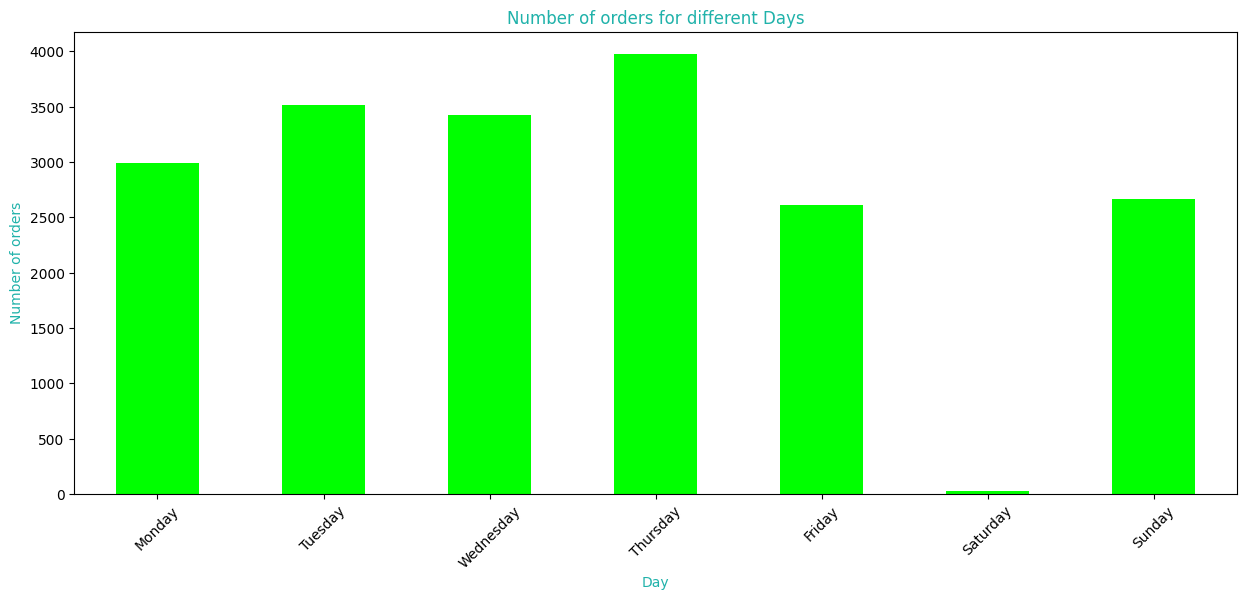

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
ax.set_title("Number of orders for different Days", color="lightseagreen")
df["DayOfWeek"] = df["InvoiceDate"].dt.strftime("%A")
group_by_day = df.groupby("DayOfWeek")
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
group_by_day["InvoiceNumber"].nunique().loc[day_order].plot(kind="bar", ax=ax, color="lime")
plt.xlabel("Day", color="lightseagreen")
plt.ylabel("Number of orders", color="lightseagreen")
plt.xticks(rotation=45);

## Bar chart of the total sales of each month of each year

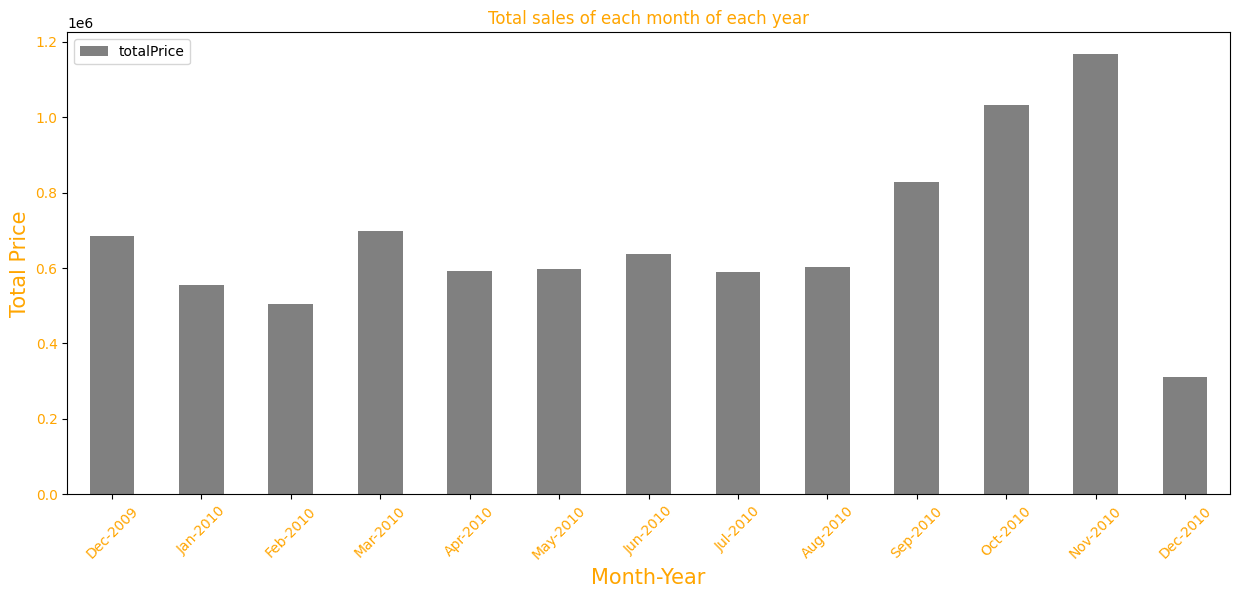

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
ax.set_title("Total sales of each month of each year", color="orange")
df["Month-Year"] = df["InvoiceDate"].dt.strftime("%b-%Y")
df["totalPrice"] = df["UnitPrice"] * df["Quantity"]

# Group data by Month-Year and calculate totalPrice for each group
group_by_month_year = df.groupby("Month-Year")["totalPrice"].sum().reset_index()
# Sort by datetime
group_by_month_year["Month-Year"] = pd.to_datetime(group_by_month_year["Month-Year"], format="%b-%Y")
group_by_month_year = group_by_month_year.sort_values(by="Month-Year")
# Change column format back.
group_by_month_year["Month-Year"] = group_by_month_year["Month-Year"].dt.strftime("%b-%Y")

# Create plot
group_by_month_year.plot(kind="bar", x="Month-Year", y="totalPrice", ax=ax, color="gray")
plt.xlabel("Month-Year", color="orange", size=15)
plt.ylabel("Total Price", color="orange", size=15)
plt.xticks(rotation=45, color="orange")
plt.yticks(color="orange");

## Read preprocessed data using pandas

In [10]:
df = pd.read_csv("preprocessed_sales.csv")
df.head()

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


<h2 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="green">
Drawing a scatter diagram of the amount of sales and the number of customers
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: left;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
In this step, on a scatter chart, we show different countries based on the amount of sales and the number of their customers. In addition, we divide the countries into 4 groups according to the amount of sales and the number of customers, and we determine the color of the points related to the countries based on their group.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: left;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
If we show the amount of sales with <code>SA</code> and the third quarter with <code>qSA</code>, and the number of customers with <code>CC</code> and the third quarter with <code>qCC</code>, 4 groups of countries are defined as follows:
</font>
</p>

<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>

| <b>group number</b> |     <b>group title</b>      |                        <b>condition</b>                         |     <b>color</b>     |
|:-------------------:|:---------------------------:|:---------------------------------------------------------------:|:--------------------:|
|          1          | Highest customer & revenue  | <code dir=ltr>SA > qSA</code> and <code dir=ltr>CC > qCC</code> |   <code>red</code>   |
|          2          | High customer & low revenue | <code dir=ltr>SA < qSA</code> and <code dir=ltr>CC > qCC</code> |  <code>blue</code>   |
|          3          | High revenue & low customer | <code dir=ltr>SA > qSA</code> and <code dir=ltr>CC < qCC</code> | <code>green</code>   |
|          4          |   Low customer & revenue    | <code dir=ltr>SA < qSA</code> and <code dir=ltr>CC < qCC</code> |  <code>cyan</code>   |

</font>
</div>
</center>

In [35]:
# Calculate total price.
df["totalPrice"] = df["Quantity"] * df["UnitPrice"]

# total sales amount per country.
sales_amount_df = df.groupby("Country")["totalPrice"].sum().reset_index(name="totalSale")

# Calculate number of customers per country.
number_of_customers = df.groupby("Country")["CustomerId"].nunique().reset_index(name="Number of customers")

market_study: pd.DataFrame = sales_amount_df.merge(number_of_customers, on="Country")
# Removing United Kingdom country from group (outliers).
market_study = market_study[market_study.Country != "United Kingdom"]
market_study.head()

,Country,totalSale,Number of customers
0,Australia,31446.80,15
1,Austria,13414.33,10
2,Bahrain,805.97,2
3,Belgium,24537.58,17
4,Brazil,268.27,1


### Finding label of the group of each country based on the given table.

In [36]:
SALES = "totalSale"
CUSTOMERS = "Number of customers"

def create_label(row: pd.Series, x_range: float, y_range: float) -> int:
    sales_amount = row[SALES]
    total_customers = row[CUSTOMERS]

    if sales_amount >= x_range and total_customers >= y_range:
        return 1
    elif sales_amount < x_range and total_customers > y_range:
        return 2
    elif sales_amount > x_range and total_customers < y_range:
        return 3
    else:
        return 4

x = market_study[SALES].quantile(0.75)
y = market_study[CUSTOMERS].quantile(0.75)
# Creating label for each row.
market_study["Label"] = market_study.apply(lambda row : create_label(row, x, y), axis=1)
market_study.head()

,Country,totalSale,Number of customers,Label
0,Australia,31446.80,15,1
1,Austria,13414.33,10,4
2,Bahrain,805.97,2,4
3,Belgium,24537.58,17,2
4,Brazil,268.27,1,4


### Create scatter plot

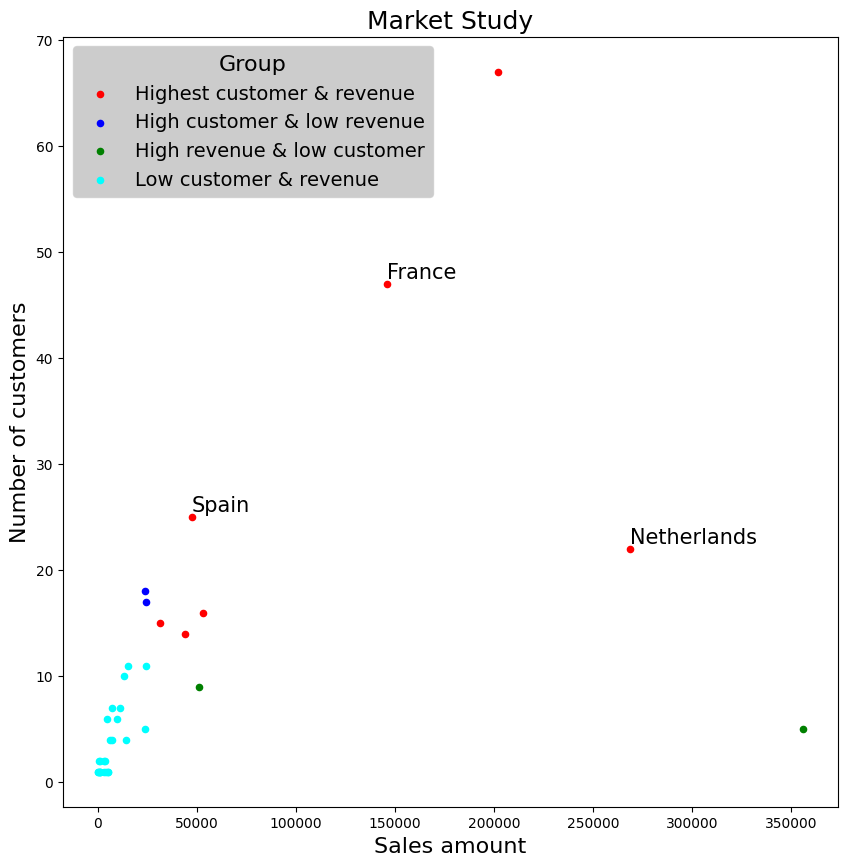

In [42]:
fig, ax = plt.subplots(figsize=(10, 10))

# Define colors for each label
colors = {1: 'red', 2: 'blue', 3: 'green', 4: 'cyan'}

# Define labels
labels = {
    1: 'Highest customer & revenue',
    2: 'High customer & low revenue',
    3: 'High revenue & low customer',
    4: 'Low customer & revenue',
}

for label, color in colors.items():
    ax.scatter(market_study[market_study["Label"] == label]["totalSale"],
               market_study[market_study["Label"] == label]["Number of customers"], color=color, s=20,
               label=labels[label])

ax.set_xlabel("Sales amount", fontsize = 16)
ax.set_ylabel("Number of customers", fontsize = 16)
ax.set_title("Market Study",fontsize = 18)

ax.legend(fontsize=14, title='Group', title_fontsize=16, frameon=True, facecolor='silver')

ax.text(float(market_study[market_study.Country == "France"]["totalSale"].iloc[0]),
        float(market_study[market_study.Country == "France"]["Number of customers"].iloc[0]) + 0.5, "France",
        fontsize=15)

ax.text(float(market_study[market_study.Country == "Spain"]["totalSale"].iloc[0]),
        float(market_study[market_study.Country == "Spain"]["Number of customers"].iloc[0]) + 0.5, "Spain",
        fontsize=15)

ax.text(float(market_study[market_study.Country == "Netherlands"]["totalSale"].iloc[0]),
        float(market_study[market_study.Country == "Netherlands"]["Number of customers"].iloc[0]) + 0.5,
        "Netherlands", fontsize=15);